In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.time_based_class import *
from ipynb.fs.full.model_evaluation_func import *
import pickle
from sklearn.model_selection import GridSearchCV

In [2]:
crime = pd.read_csv('crime1.csv')

# change to datetime
crime["Month"] = pd.to_datetime(crime["Month"])

In [3]:
crime

,Month,LSOA,Type,Total,Avg_temp,Med_price,Uni_credit
0,2017-11-01,Birmingham 001A,Anti-social behaviour,0.0,7,410000.0,6.0
1,2017-11-01,Birmingham 001A,Criminal damage and arson,0.0,7,410000.0,6.0
2,2017-11-01,Birmingham 001A,Other theft,1.0,7,410000.0,6.0
3,2017-11-01,Birmingham 001A,Public order,0.0,7,410000.0,6.0
4,2017-11-01,Birmingham 001A,Vehicle crime,0.0,7,410000.0,6.0
...,...,...,...,...,...,...,...
846715,2020-10-01,Wolverhampton 035H,Robbery,0.0,10,106000.0,414.0
846716,2020-10-01,Wolverhampton 035H,Other crime,0.0,10,106000.0,414.0
846717,2020-10-01,Wolverhampton 035H,Theft from the person,1.0,10,106000.0,414.0
846718,2020-10-01,Wolverhampton 035H,Drugs,1.0,10,106000.0,414.0


### Categorical Variable Encoding : time-based target encoding

In [4]:
Target_enc = FCTargetEncoder('Total')
Target_enc.transform(crime, drop_target = False, drop_na = True, drop_cat = False)

Train period: 2017-11-01 - 2017-12-01 , Test period 2017-12-01 - 2018-01-01
Train period: 2017-11-01 - 2018-01-01 , Test period 2018-01-01 - 2018-02-01
Train period: 2017-11-01 - 2018-02-01 , Test period 2018-02-01 - 2018-03-01
Train period: 2017-11-01 - 2018-03-01 , Test period 2018-03-01 - 2018-04-01
Train period: 2017-11-01 - 2018-04-01 , Test period 2018-04-01 - 2018-05-01
Train period: 2017-11-01 - 2018-05-01 , Test period 2018-05-01 - 2018-06-01
Train period: 2017-11-01 - 2018-06-01 , Test period 2018-06-01 - 2018-07-01
Train period: 2017-11-01 - 2018-07-01 , Test period 2018-07-01 - 2018-08-01
Train period: 2017-11-01 - 2018-08-01 , Test period 2018-08-01 - 2018-09-01
Train period: 2017-11-01 - 2018-09-01 , Test period 2018-09-01 - 2018-10-01
Train period: 2017-11-01 - 2018-10-01 , Test period 2018-10-01 - 2018-11-01
Train period: 2017-11-01 - 2018-11-01 , Test period 2018-11-01 - 2018-12-01
Train period: 2017-11-01 - 2018-12-01 , Test period 2018-12-01 - 2019-01-01
Train period

,Month,LSOA,Type,Total,Avg_temp,Med_price,Uni_credit,LSOA_target_mean,Type_target_mean
23520,2017-12-01,Birmingham 001A,Anti-social behaviour,0.0,5,410000.0,11.0,0.142857,2.485119
23521,2017-12-01,Birmingham 001A,Criminal damage and arson,1.0,5,410000.0,11.0,0.142857,1.359524
23522,2017-12-01,Birmingham 001A,Other theft,0.0,5,410000.0,11.0,0.142857,1.214286
23523,2017-12-01,Birmingham 001A,Public order,0.0,5,410000.0,11.0,0.142857,0.585714
23524,2017-12-01,Birmingham 001A,Vehicle crime,1.0,5,410000.0,11.0,0.142857,1.833929
...,...,...,...,...,...,...,...,...,...
846715,2020-10-01,Wolverhampton 035H,Robbery,0.0,10,106000.0,414.0,2.506122,0.394983
846716,2020-10-01,Wolverhampton 035H,Other crime,0.0,10,106000.0,414.0,2.506122,0.209932
846717,2020-10-01,Wolverhampton 035H,Theft from the person,1.0,10,106000.0,414.0,2.506122,0.143844
846718,2020-10-01,Wolverhampton 035H,Drugs,1.0,10,106000.0,414.0,2.506122,0.252568


In [5]:
# saving category dataframe for API reference
cat_df = crime.loc[823200:, ['LSOA', 'LSOA_target_mean', 'Type', 'Type_target_mean']]
cat_df.to_csv("cat_df.csv", index = False)

### Time-Based Nested Cross Validation

In [5]:
outer_cv = TimeBasedCV(train_period = 24 , test_period = 1)
split_date = datetime.strptime('2019-12-01', '%Y-%m-%d').date()
train_test_idx = outer_cv.forward_chaining(crime, first_split_date = split_date) 

Train period: 2017-12-01 - 2019-12-01 , Test period 2019-12-01 - 2020-01-01
Train period: 2017-12-01 - 2020-01-01 , Test period 2020-01-01 - 2020-02-01
Train period: 2017-12-01 - 2020-02-01 , Test period 2020-02-01 - 2020-03-01
Train period: 2017-12-01 - 2020-03-01 , Test period 2020-03-01 - 2020-04-01
Train period: 2017-12-01 - 2020-04-01 , Test period 2020-04-01 - 2020-05-01
Train period: 2017-12-01 - 2020-05-01 , Test period 2020-05-01 - 2020-06-01
Train period: 2017-12-01 - 2020-06-01 , Test period 2020-06-01 - 2020-07-01
Train period: 2017-12-01 - 2020-07-01 , Test period 2020-07-01 - 2020-08-01
Train period: 2017-12-01 - 2020-08-01 , Test period 2020-08-01 - 2020-09-01
Train period: 2017-12-01 - 2020-09-01 , Test period 2020-09-01 - 2020-10-01
Train period: 2017-12-01 - 2020-10-01 , Test period 2020-10-01 - 2020-11-01


In [6]:
inner_cv = TimeBasedCV(train_period = 23 , test_period = 1)
split_date = datetime.strptime('2019-11-01', '%Y-%m-%d').date()
train_val_idx = inner_cv.forward_chaining(crime, first_split_date = split_date) 
del train_val_idx[-1] # delete the last month 

Train period: 2017-12-01 - 2019-11-01 , Test period 2019-11-01 - 2019-12-01
Train period: 2017-12-01 - 2019-12-01 , Test period 2019-12-01 - 2020-01-01
Train period: 2017-12-01 - 2020-01-01 , Test period 2020-01-01 - 2020-02-01
Train period: 2017-12-01 - 2020-02-01 , Test period 2020-02-01 - 2020-03-01
Train period: 2017-12-01 - 2020-03-01 , Test period 2020-03-01 - 2020-04-01
Train period: 2017-12-01 - 2020-04-01 , Test period 2020-04-01 - 2020-05-01
Train period: 2017-12-01 - 2020-05-01 , Test period 2020-05-01 - 2020-06-01
Train period: 2017-12-01 - 2020-06-01 , Test period 2020-06-01 - 2020-07-01
Train period: 2017-12-01 - 2020-07-01 , Test period 2020-07-01 - 2020-08-01
Train period: 2017-12-01 - 2020-08-01 , Test period 2020-08-01 - 2020-09-01
Train period: 2017-12-01 - 2020-09-01 , Test period 2020-09-01 - 2020-10-01
Train period: 2017-12-01 - 2020-10-01 , Test period 2020-10-01 - 2020-11-01


## Models

In [7]:
# change to np.array 
y = crime.Total.to_numpy()
X = crime.drop(["Month", "Total", 'LSOA', 'Type'], axis = 1).to_numpy()

# change to array index from df index
for i in range(0, len(train_val_idx), 1):
    train_val_idx[i] = list(train_val_idx[i])
    train_test_idx[i] = list(train_test_idx[i])
    
    for j in range(0, 2, 1):
        train_val_idx[i][j] = [idx - 23520 for idx in train_val_idx[i][j]]
        train_test_idx[i][j] = [idx - 23520 for idx in train_test_idx[i][j]]
        
    train_val_idx[i] = tuple(train_val_idx[i])
    train_test_idx[i]= tuple(train_test_idx[i])

In [8]:
def train_val_error(Model, X, y, cv = train_val_idx):
    
    model = Model
    
    train_error_list = []
    valid_error_list = []
    
    for train, valid in cv:
        X_train, X_valid = X[train], X[valid]
        y_train, y_valid = y[train].ravel(), y[valid].ravel()
        
        train_error, valid_error = cal_metrics(X_train, y_train, X_valid, y_valid, model)
        train_error_list.append(train_error)
        valid_error_list.append(valid_error)
    
    print("Inner loop : Mean MAE for {} time-based cross-validation : {}".format(len(valid_error_list), np.mean(valid_error_list)))
    plot_metrics(train_error_list, valid_error_list)

In [9]:
def test_performance(Model, X, y, train_val_idx, train_test_idx):
    
    model = Model
    
    test_error_list = []
    
    for i in range(0, 11, 1):
        X_train = X[train_val_idx[i][0]]
        y_train = y[train_val_idx[i][0]].ravel()
        
        model.fit(X_train, y_train)
        
        X_test = X[train_test_idx[i][1]]
        y_test = y[train_test_idx[i][1]].ravel()
        
        test_error = cal_validation_error(X_test, y_test, model)
        test_error_list.append(test_error)    
        
    print("Outer loop : Mean MAE for {} time-based cross-validation : {}".format(len(test_error_list), np.mean(test_error_list)))

### Linear Regression

Outer loop : Mean MAE for 11 time-based cross-validation : 1.0342114979110544
Inner loop : Mean MAE for 11 time-based cross-validation : 1.0241102629914831


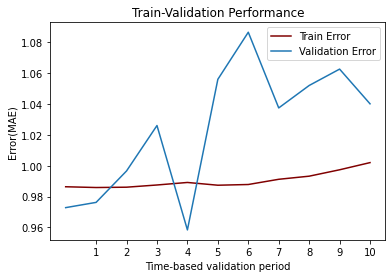

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
test_performance(model, X, y, train_val_idx, train_test_idx)
train_val_error(model, X, y, cv = train_val_idx)

### Polynomial Regression

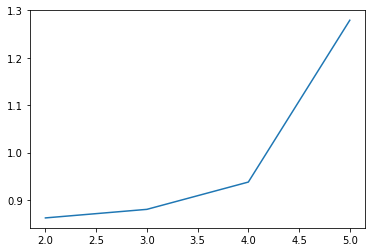

In [16]:
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
degree = []
error = []

for i in range(2, 6, 1):
    degree.append(i)
    poly = PolynomialFeatures(i, include_bias = False)
    x_poly = poly.fit_transform(X)
    valid_error = []
    
    for train, valid in train_val_idx:
        X_train, X_valid = x_poly[train], x_poly[valid]
        y_train, y_valid = y[train].ravel(), y[valid].ravel()
        model.fit(X_train, y_train)
        valid_error.append(cal_validation_error(X_valid, y_valid, model))
    error.append(np.mean(valid_error))
        
        
plt.plot(degree, error)

In [25]:
min(error)

0.8623920739933942

### Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

model = Lasso()

parameters = {'alpha':[i/100 for i in range(1,100,1)]}

gs_lasso = GridSearchCV(estimator=model, param_grid=parameters, 
                        scoring='neg_mean_absolute_error', cv = train_val_idx)

best_model_lasso = gs_lasso.fit(X=X, y=y).best_estimator_

In [26]:
best_model_lasso

Lasso(alpha=0.14)

In [28]:
gs_lasso.best_score_

-1.0120248068901756

In [29]:
test_performance(best_model_lasso, X, y, train_val_idx, train_test_idx)

Outer loop : Mean MAE for 11 time-based cross-validation : 1.0241801679983207


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

parameters = {'max_features':['auto', 'log2', 'sqrt' ], 'n_estimators':[i for i in range(100, 300, 50)],
             'max_depth': [5, 10, 20, 40, 80]}

gs_rf = GridSearchCV(estimator=model, param_grid=parameters,
                     scoring='neg_mean_absolute_error', cv = train_val_idx)

best_model_rf = gs_rf.fit(X=X, y=y).best_estimator_

In [30]:
best_model_rf

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=250)

In [31]:
gs_rf.best_score_

-0.798311539033993

In [32]:
test_performance(best_model_rf, X, y, train_val_idx, train_test_idx)

Outer loop : Mean MAE for 11 time-based cross-validation : 0.8369630883520173


### Gradient Boosted Tree

In [33]:
from xgboost import XGBRegressor

model = XGBRegressor()

parameters = {'max_depth':[max_d for max_d in range(5, 9)], 'min_child_weight': [min_ch for min_ch in range(1, 5)], 
              'eta':[i/10. for i in range(1,5)]}

gs_xgb = GridSearchCV(estimator=model, param_grid= parameters,
                      scoring='neg_mean_absolute_error', cv = train_val_idx)

best_model_xgb = gs_xgb.fit(X=X, y=y).best_estimator_

In [34]:
best_model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
gs_xgb.best_score_

-0.8010500628716585

In [36]:
test_performance(best_model_xgb, X, y, train_val_idx, train_test_idx)

Outer loop : Mean MAE for 11 time-based cross-validation : 0.8327629853921195


## The Final Model

Inner loop : Mean MAE for 11 time-based cross-validation : 0.8141224744495286


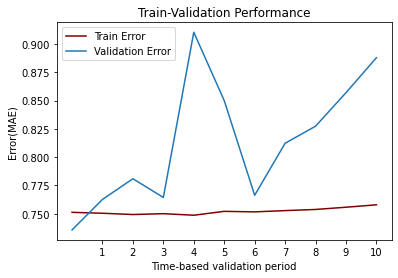

In [42]:
model = best_model_xgb
train_val_error(model, X, y, cv = train_test_idx)

In [43]:
# saving model
pickl = {'model': model}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ))